In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
# Case numbers
case_number = 3
version_number = 1
ifname = f"../results/inputfiles/test{case_number}.csv"
ofname = f"../results/outputs/out{case_number}_v{version_number}.csv"
ifcolumns = ["timestamp", "operation", "account", "amount", "duration"]
ofcolumns = [
    "timestamp",
    "totalParticipants",
    "averageMagnitude",
    "totalDeposited",
    "cumulative",
]
ONE_DAY = 24 * 3600
ONE_WEEK = ONE_DAY * 7
ONE_ETHER = 10**18

input_df = pd.read_csv(ifname, header=None)
input_df.columns = ifcolumns
output_df = pd.read_csv(ofname, header=None)
output_df.columns = ofcolumns
output_df["totalDeposited"] = output_df["totalDeposited"].apply(
    lambda x: int(x) / ONE_ETHER
)

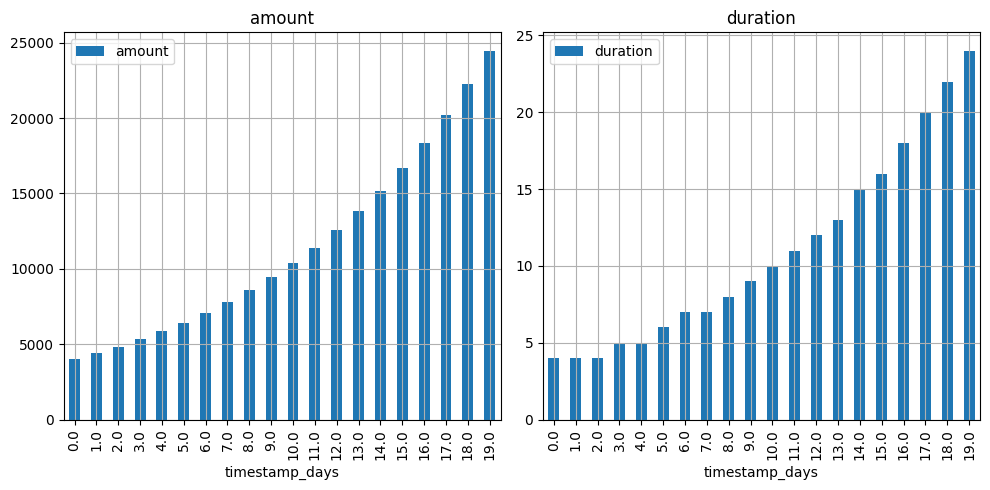

In [85]:
# Input processing
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

columns = ["amount", "duration"]

for ax, column in zip(axs.flatten(), columns):
    input_df.plot(x="timestamp_days", y=column, style=".-", ax=ax, kind="bar")
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()

In [ ]:
# Ouput processing
output_df["timestamp_days"] = (output_df["timestamp"] / ONE_DAY).floordiv(1)
output_df

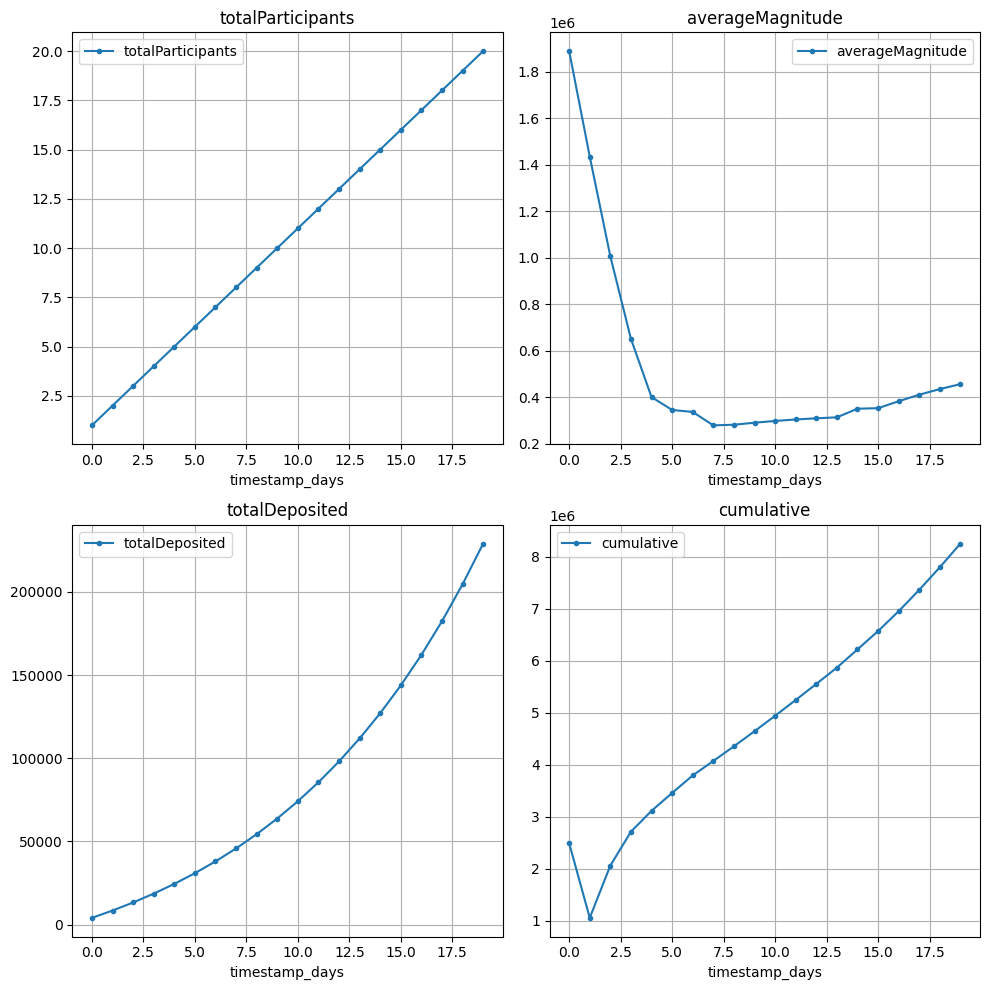

In [80]:
# # Output file
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Creating a 2x2 grid of subplots

columns = ofcolumns[1:]

for ax, column in zip(axs.flatten(), columns):
    output_df.plot(x="timestamp_days", y=column, style=".-", ax=ax)
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()